## Compress SDF map with autoencoders

In [3]:
import keras
from keras import layers

In [57]:
# This is the size of our encoded representations
encoding_dim = 1024  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

width = 702
height = 711

# This is our input image
input_img = keras.Input(shape=(2, ), name = 'input_layer')

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu', name = 'encoding_layer')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(4, activation='sigmoid', name = 'decoding_layer')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [49]:
from PIL import Image
from numpy import asarray
import numpy as np

coordinates_file = "./files/coordinates.txt"
distances_file = "./files/distances.txt"
image_file = "./densityMap.png"
image = Image.open(image_file)
data = asarray(image)

from ast import literal_eval
with open(coordinates_file) as f:
    coordinates = [literal_eval(line) for line in f]
X = asarray(coordinates[0])

with open(distances_file) as f:
    distances = [literal_eval(line) for line in f]
y = asarray(distances[0]).reshape(width * height,1)


#Using density image
X = []
for i in range(height):
    for j in range(width):
        X.append([j/width, i/height])
X = asarray(X)

y = (data.astype('float32') / 255).reshape(width * height, 4)

print (X.shape)
print (y.shape)

(499122, 2)
(499122, 4)


In [62]:
autoencoder.fit(x = X, y = y,
                epochs=200)

Epoch 1/200
15598/15598 [==============================] - 9s 593us/step - loss: 0.0616
Epoch 2/200
15598/15598 [==============================] - 9s 576us/step - loss: 0.0616
Epoch 3/200
15598/15598 [==============================] - 9s 577us/step - loss: 0.0616
Epoch 4/200
15598/15598 [==============================] - 9s 588us/step - loss: 0.0615
Epoch 5/200
15598/15598 [==============================] - 9s 591us/step - loss: 0.0615
Epoch 6/200
15598/15598 [==============================] - 9s 569us/step - loss: 0.0614
Epoch 7/200
15598/15598 [==============================] - 9s 568us/step - loss: 0.0615
Epoch 8/200
15598/15598 [==============================] - 9s 590us/step - loss: 0.0614
Epoch 9/200
15598/15598 [==============================] - 9s 570us/step - loss: 0.0613
Epoch 10/200
15598/15598 [==============================] - 9s 570us/step - loss: 0.0613
Epoch 11/200
15598/15598 [==============================] - 9s 582us/step - loss: 0.0616
Epoch 12/200
15598/15598 [====

15598/15598 [==============================] - 9s 562us/step - loss: 0.0566
Epoch 185/200
15598/15598 [==============================] - 9s 565us/step - loss: 0.0566
Epoch 186/200
15598/15598 [==============================] - 9s 558us/step - loss: 0.0564
Epoch 187/200
15598/15598 [==============================] - 9s 569us/step - loss: 0.0565
Epoch 188/200
15598/15598 [==============================] - 9s 605us/step - loss: 0.0565
Epoch 189/200
15598/15598 [==============================] - 9s 595us/step - loss: 0.0565
Epoch 190/200
15598/15598 [==============================] - 9s 608us/step - loss: 0.0563
Epoch 191/200
15598/15598 [==============================] - 9s 600us/step - loss: 0.0560
Epoch 192/200
15598/15598 [==============================] - 9s 567us/step - loss: 0.0560
Epoch 193/200
15598/15598 [==============================] - 9s 561us/step - loss: 0.0562
Epoch 194/200
15598/15598 [==============================] - 9s 568us/step - loss: 0.0562
Epoch 195/200
15598/1559

In [63]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(encoded_imgs)

<ipython-input-65-ad78e44d957e>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(2, n, i + 1 + n)


ValueError: cannot reshape array of size 511100928 into shape (1024,1024,4)

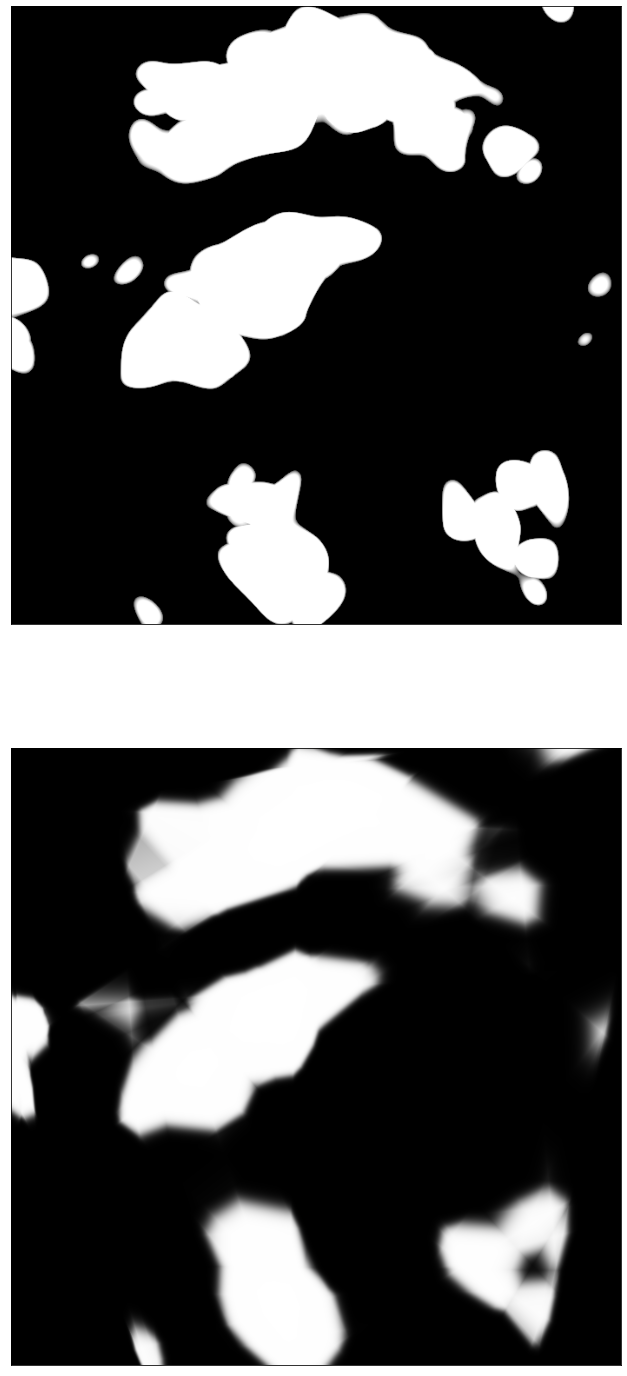

In [65]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 1  # How many images we are going to display
plt.figure(figsize=(25, 25))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(y.reshape(height, width, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs.reshape(height, width,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs.reshape(1024, 1024,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()